In [11]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_excel("RankingEscola1.xlsx", sheet_name='2017&2019')
data.head(2)

,Year,Name,County,National Average (by School),National Ranking,Public School /Private School,Country,Math Exam (Average Grade By School),Math Raking,Portuguese Exam (Average Grade By School),Portuguese Raking,Buying Power
0,2017,Colégio Nossa Senhora do Rosário,Porto,14.92,1,Private School,Portugal,15.59,3,13.22,28,129.55
1,2017,Academia de Música de Santa Cecília,Lisboa,14.71,2,Private School,Portugal,16.28,1,12.26,77,163.70


In [13]:
data.tail(2)

,Year,Name,County,National Average (by School),National Ranking,Public School /Private School,Country,Math Exam (Average Grade By School),Math Raking,Portuguese Exam (Average Grade By School),Portuguese Raking,Buying Power
1126,2019,Escola Secundária Fonseca Benevides,Lisboa,6.25,563,Public School,Portugal,5.2,557,7.34,561,163.7
1127,2019,Colégio de Gaia,Vila Nova de Gaia,3.30,564,Private School,Portugal,5.2,558,3.30,562,100.6


In [32]:
year = 2017
filtered2017 = data[data['Year']==year]
filtered2017

,Year,Name,County,National Average (by School),National Ranking,Public School /Private School,Country,Math Exam (Average Grade By School),Math Raking,Portuguese Exam (Average Grade By School),Portuguese Raking,Buying Power
0,2017,Colégio Nossa Senhora do Rosário,Porto,14.92,1,Private School,Portugal,15.590,3,13.22,28,129.55
1,2017,Academia de Música de Santa Cecília,Lisboa,14.71,2,Private School,Portugal,16.280,1,12.26,77,163.70
2,2017,Colégio Horizonte,Vila Nova de Gaia,14.26,3,Private School,Portugal,14.400,19,12.26,78,100.60
3,2017,Colégio D. Diogo de Sousa,Braga,14.24,4,Private School,Portugal,16.160,2,13.15,32,108.80
4,2017,Colégio Arautos do Evangelho,Guimarães,14.15,5,Private School,Portugal,15.325,6,14.53,2,91.30
...,...,...,...,...,...,...,...,...,...,...,...,...
559,2017,Escola Básica e Secundária de Santo António,Barreiro,7.08,560,Public School,Portugal,4.810,559,7.98,525,100.30
560,2017,Escola Secundária da Baixa da Banheira,Moita,6.47,561,Public School,Portugal,3.130,561,5.17,534,83.40
561,2017,Externato Álvares Cabral,Lisboa,5.49,562,Private School,Portugal,1.200,562,9.46,564,163.70
562,2017,Colégio Real Colégio de Portugal,Lisboa,5.29,563,Private School,Portugal,0.600,563,13.75,10,163.70


In [47]:
filtered2017["National Average (by School)"].median()

10.285

In [34]:
def standardize(col):
    z= (col - col.mean())/col.std()
    return z

In [36]:
filtered2017['National Average (by School) _std'] = standardize(filtered2017)['National Average (by School)']
filtered2017

<ipython-input-36-81b7514725bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered2017['National Average (by School) _std'] = standardize(filtered2017)['National Average (by School)']


,Year,Name,County,National Average (by School),National Ranking,Public School /Private School,Country,Math Exam (Average Grade By School),Math Raking,Portuguese Exam (Average Grade By School),Portuguese Raking,Buying Power,National Average (by School) _std
0,2017,Colégio Nossa Senhora do Rosário,Porto,14.92,1,Private School,Portugal,15.590,3,13.22,28,129.55,3.466543
1,2017,Academia de Música de Santa Cecília,Lisboa,14.71,2,Private School,Portugal,16.280,1,12.26,77,163.70,3.308406
2,2017,Colégio Horizonte,Vila Nova de Gaia,14.26,3,Private School,Portugal,14.400,19,12.26,78,100.60,2.969543
3,2017,Colégio D. Diogo de Sousa,Braga,14.24,4,Private School,Portugal,16.160,2,13.15,32,108.80,2.954482
4,2017,Colégio Arautos do Evangelho,Guimarães,14.15,5,Private School,Portugal,15.325,6,14.53,2,91.30,2.886709
...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,2017,Escola Básica e Secundária de Santo António,Barreiro,7.08,560,Public School,Portugal,4.810,559,7.98,525,100.30,-2.437214
560,2017,Escola Secundária da Baixa da Banheira,Moita,6.47,561,Public School,Portugal,3.130,561,5.17,534,83.40,-2.896563
561,2017,Externato Álvares Cabral,Lisboa,5.49,562,Private School,Portugal,1.200,562,9.46,564,163.70,-3.634533
562,2017,Colégio Real Colégio de Portugal,Lisboa,5.29,563,Private School,Portugal,0.600,563,13.75,10,163.70,-3.785139


<AxesSubplot:>

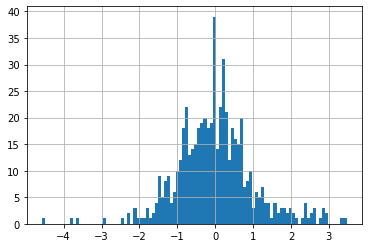

In [37]:
filtered2017['National Average (by School) _std'].hist(bins=100)

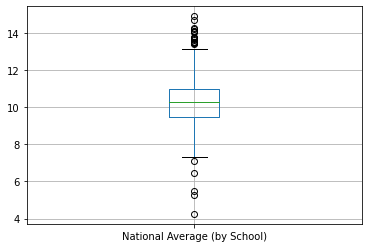

In [38]:
filtered2017.boxplot(column='National Average (by School)')

plt.show()

In [39]:
def outlier2017(row):
    q1 = np.percentile(filtered2017['National Average (by School)'], 25)  
    q3 = np.percentile(filtered2017['National Average (by School)'], 75)
    int = q3 - q1
    out1 = q1 - 1.5 * int
    out3 = q3 + 1.5 * int
    
    if row['National Average (by School)'] >= out3:
        return "Outlier"
    if row['National Average (by School)'] <= out1:
        return "Outlier"
    else:
        return "No outlier"


filtered2017['Outlier'] = filtered2017.apply(outlier2017, axis=1)
filtered2017

<ipython-input-39-1216867aea3a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered2017['Outlier'] = filtered2017.apply(outlier2017, axis=1)


,Year,Name,County,National Average (by School),National Ranking,Public School /Private School,Country,Math Exam (Average Grade By School),Math Raking,Portuguese Exam (Average Grade By School),Portuguese Raking,Buying Power,National Average (by School) _std,Outlier
0,2017,Colégio Nossa Senhora do Rosário,Porto,14.92,1,Private School,Portugal,15.590,3,13.22,28,129.55,3.466543,Outlier
1,2017,Academia de Música de Santa Cecília,Lisboa,14.71,2,Private School,Portugal,16.280,1,12.26,77,163.70,3.308406,Outlier
2,2017,Colégio Horizonte,Vila Nova de Gaia,14.26,3,Private School,Portugal,14.400,19,12.26,78,100.60,2.969543,Outlier
3,2017,Colégio D. Diogo de Sousa,Braga,14.24,4,Private School,Portugal,16.160,2,13.15,32,108.80,2.954482,Outlier
4,2017,Colégio Arautos do Evangelho,Guimarães,14.15,5,Private School,Portugal,15.325,6,14.53,2,91.30,2.886709,Outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,2017,Escola Básica e Secundária de Santo António,Barreiro,7.08,560,Public School,Portugal,4.810,559,7.98,525,100.30,-2.437214,Outlier
560,2017,Escola Secundária da Baixa da Banheira,Moita,6.47,561,Public School,Portugal,3.130,561,5.17,534,83.40,-2.896563,Outlier
561,2017,Externato Álvares Cabral,Lisboa,5.49,562,Private School,Portugal,1.200,562,9.46,564,163.70,-3.634533,Outlier
562,2017,Colégio Real Colégio de Portugal,Lisboa,5.29,563,Private School,Portugal,0.600,563,13.75,10,163.70,-3.785139,Outlier


In [40]:
var = "Outlier"
filtered2017_out = filtered2017[filtered2017['Outlier']==var]
filtered2017_out

,Year,Name,County,National Average (by School),National Ranking,Public School /Private School,Country,Math Exam (Average Grade By School),Math Raking,Portuguese Exam (Average Grade By School),Portuguese Raking,Buying Power,National Average (by School) _std,Outlier
0,2017,Colégio Nossa Senhora do Rosário,Porto,14.92,1,Private School,Portugal,15.590,3,13.22,28,129.55,3.466543,Outlier
1,2017,Academia de Música de Santa Cecília,Lisboa,14.71,2,Private School,Portugal,16.280,1,12.26,77,163.70,3.308406,Outlier
2,2017,Colégio Horizonte,Vila Nova de Gaia,14.26,3,Private School,Portugal,14.400,19,12.26,78,100.60,2.969543,Outlier
3,2017,Colégio D. Diogo de Sousa,Braga,14.24,4,Private School,Portugal,16.160,2,13.15,32,108.80,2.954482,Outlier
4,2017,Colégio Arautos do Evangelho,Guimarães,14.15,5,Private School,Portugal,15.325,6,14.53,2,91.30,2.886709,Outlier
5,2017,Colégio Manuel Bernardes,Lisboa,14.14,6,Private School,Portugal,14.490,16,13.10,33,163.70,2.879179,Outlier
6,2017,Colégio de Santa Doroteia,Lisboa,14.09,7,Private School,Portugal,15.590,4,12.48,57,163.70,2.841528,Outlier
7,2017,Colégio São João de Brito,Lisboa,14.05,8,Private School,Portugal,15.110,7,13.30,23,163.70,2.811406,Outlier
8,2017,Salesianos de Lisboa,Lisboa,13.78,9,Private School,Portugal,14.500,15,13.20,30,163.70,2.608088,Outlier
9,2017,Colégio St. Peter's School,Palmela,13.77,10,Private School,Portugal,14.630,10,12.52,56,100.80,2.600558,Outlier


In [43]:
filtered2017['Outlier'].value_counts()

No outlier    540
Outlier        24
Name: Outlier, dtype: int64

In [42]:
filtered2017['bins'] = pd.cut(filtered2017['Buying Power'], bins=5)
filtered2017

<ipython-input-42-0a84d3f1d31f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered2017['bins'] = pd.cut(filtered2017['Buying Power'], bins=5)


,Year,Name,County,National Average (by School),National Ranking,Public School /Private School,Country,Math Exam (Average Grade By School),Math Raking,Portuguese Exam (Average Grade By School),Portuguese Raking,Buying Power,National Average (by School) _std,Outlier,bins
0,2017,Colégio Nossa Senhora do Rosário,Porto,14.92,1,Private School,Portugal,15.590,3,13.22,28,129.55,3.466543,Outlier,"(119.82, 141.76]"
1,2017,Academia de Música de Santa Cecília,Lisboa,14.71,2,Private School,Portugal,16.280,1,12.26,77,163.70,3.308406,Outlier,"(141.76, 163.7]"
2,2017,Colégio Horizonte,Vila Nova de Gaia,14.26,3,Private School,Portugal,14.400,19,12.26,78,100.60,2.969543,Outlier,"(97.88, 119.82]"
3,2017,Colégio D. Diogo de Sousa,Braga,14.24,4,Private School,Portugal,16.160,2,13.15,32,108.80,2.954482,Outlier,"(97.88, 119.82]"
4,2017,Colégio Arautos do Evangelho,Guimarães,14.15,5,Private School,Portugal,15.325,6,14.53,2,91.30,2.886709,Outlier,"(75.94, 97.88]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,2017,Escola Básica e Secundária de Santo António,Barreiro,7.08,560,Public School,Portugal,4.810,559,7.98,525,100.30,-2.437214,Outlier,"(97.88, 119.82]"
560,2017,Escola Secundária da Baixa da Banheira,Moita,6.47,561,Public School,Portugal,3.130,561,5.17,534,83.40,-2.896563,Outlier,"(75.94, 97.88]"
561,2017,Externato Álvares Cabral,Lisboa,5.49,562,Private School,Portugal,1.200,562,9.46,564,163.70,-3.634533,Outlier,"(141.76, 163.7]"
562,2017,Colégio Real Colégio de Portugal,Lisboa,5.29,563,Private School,Portugal,0.600,563,13.75,10,163.70,-3.785139,Outlier,"(141.76, 163.7]"


In [13]:
def bins_group2017(row):
    if str(row['bins']) =="(141.76, 163.7]":
        return "Very High"
    elif str(row['bins']) =="(119.82, 141.76]":
        return "High"
    elif str(row['bins']) =="(97.88, 119.82]":
        return "Medium"
    elif str(row['bins']) =="(75.94, 97.88]":
        return "Low"
    elif str(row['bins']) =="(53.89, 75.94]":
        return  "Very Low"
    else:
        return 0

In [14]:
filtered2017['Group_bins'] = filtered2017.apply(bins_group2017, axis=1)
filtered2017

<ipython-input-14-759d3e495bd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered2017['Group_bins'] = filtered2017.apply(bins_group2017, axis=1)


,Year,Name,County,National Average (by School),National Ranking,Public School /Private School,Country,Math Exam (Average Grade By School),Math Raking,Portuguese Exam (Average Grade By School),Portuguese Raking,Buying Power,Outlier,bins,Group_bins
0,2017,Colégio Nossa Senhora do Rosário,Porto,14.92,1,Private School,Portugal,15.590,3,13.22,28,129.55,Outlier,"(119.82, 141.76]",High
1,2017,Academia de Música de Santa Cecília,Lisboa,14.71,2,Private School,Portugal,16.280,1,12.26,77,163.70,Outlier,"(141.76, 163.7]",Very High
2,2017,Colégio Horizonte,Vila Nova de Gaia,14.26,3,Private School,Portugal,14.400,19,12.26,78,100.60,Outlier,"(97.88, 119.82]",Medium
3,2017,Colégio D. Diogo de Sousa,Braga,14.24,4,Private School,Portugal,16.160,2,13.15,32,108.80,Outlier,"(97.88, 119.82]",Medium
4,2017,Colégio Arautos do Evangelho,Guimarães,14.15,5,Private School,Portugal,15.325,6,14.53,2,91.30,Outlier,"(75.94, 97.88]",Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,2017,Escola Básica e Secundária de Santo António,Barreiro,7.08,560,Public School,Portugal,4.810,559,7.98,525,100.30,Outlier,"(97.88, 119.82]",Medium
560,2017,Escola Secundária da Baixa da Banheira,Moita,6.47,561,Public School,Portugal,3.130,561,5.17,534,83.40,Outlier,"(75.94, 97.88]",Low
561,2017,Externato Álvares Cabral,Lisboa,5.49,562,Private School,Portugal,1.200,562,9.46,564,163.70,Outlier,"(141.76, 163.7]",Very High
562,2017,Colégio Real Colégio de Portugal,Lisboa,5.29,563,Private School,Portugal,0.600,563,13.75,10,163.70,Outlier,"(141.76, 163.7]",Very High


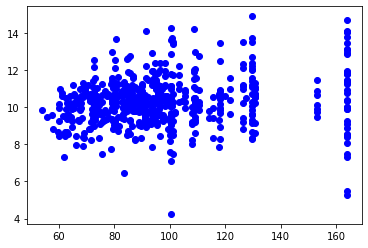

In [15]:
 plt.scatter(filtered2017['Buying Power'], filtered2017['National Average (by School)'], color="blue")

In [16]:
filtered2017[['Buying Power','National Average (by School)']].corr()

,Buying Power,National Average (by School)
Buying Power,1.000000,0.168898
National Average (by School),0.168898,1.000000


9.475281075171791

array([0.00865831])

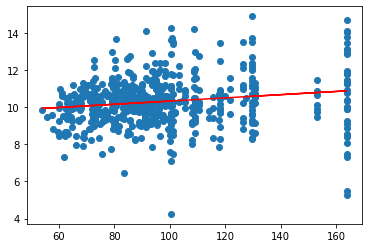

In [19]:
from sklearn import linear_model
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


x = filtered2017[['Buying Power']]
y = filtered2017['National Average (by School)']

model = linear_model.LinearRegression()

result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

regression_line = result.intercept_ + result.coef_[0]*x


plt.plot(x, regression_line, c = 'red')
plt.scatter(x,y)
plt.show()

9.475281075171791

array([0.00865831])

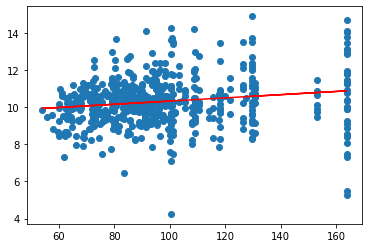

In [44]:
from sklearn import linear_model
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


x = filtered2017[['Buying Power']]
y = filtered2017['National Average (by School)']

model = linear_model.LinearRegression()

result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

regression_line = result.intercept_ + result.coef_[0]*x


plt.plot(x, regression_line, c = 'red')
plt.scatter(x,y)
plt.show()

In [ ]:
display(result.score(x,y))

In [ ]:
filtered2017_private = filtered2017[filtered2017['Public School /Private School']=="Private School"]

In [ ]:
filtered2017_public = filtered2017[filtered2017['Public School /Private School']=="Public School"]

In [ ]:
filtered2017_private["National Average (by School)"].mean()

In [ ]:
filtered2017_public["National Average (by School)"].mean()

In [ ]:
filtered2019_private = filtered2019[filtered2019['Public School /Private School']=="Private School"]

In [ ]:
filtered2019_public = filtered2019[filtered2019['Public School /Private School']=="Public School"]

In [ ]:
filtered2019_private["National Average (by School)"].mean()

In [ ]:
filtered2019_public["National Average (by School)"].mean()

In [ ]:
from sklearn import linear_model
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


x = filtered2019_private[['Buying Power']]
y = filtered2019_private["National Average (by School)"]

model = linear_model.LinearRegression()

result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

regression_line = result.intercept_ + result.coef_[0]*x


plt.plot(x, regression_line, c = 'red')
plt.scatter(x,y)
plt.show()

In [ ]:
display(result.score(x,y))

In [ ]:
from sklearn import linear_model
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


x = filtered2019_public[['Buying Power']]
y = filtered2019_public["National Average (by School)"]

model = linear_model.LinearRegression()

result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

regression_line = result.intercept_ + result.coef_[0]*x


plt.plot(x, regression_line, c = 'red')
plt.scatter(x,y)
plt.show()

In [ ]:
display(result.score(x,y))

In [ ]:
filtered2017['National Average (by School)'].hist(bins=100)

In [ ]:
def standardize(col):
    z= (col - col.mean())/col.std()
    return z

In [ ]:
filtered2019['National Average (by School) _std'] = standardize(filtered2019['National Average (by School)'])
filtered2019

In [ ]:
import pandas as pd

table = pd.DataFrame([[324, 351, 675],[156, 169, 325],[480,520, 1000]], index = ("Yes", "No", "Total men|women"), columns = ("men", "women"," Total Yes|No"))
print(table)

print("\n")

table=table/1000
print(table)

In [ ]:
filtered2019['National Average (by School) _std'].hist(bins=100)

In [ ]:
st.ttest_rel(filtered2017["National Average (by School)"], filtered2019["National Average (by School)"])

In [ ]:
from sklearn import linear_model
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


x = filtered2019_out[['Buying Power']]
y = filtered2019_out["National Average (by School)"]

model = linear_model.LinearRegression()

result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

regression_line = result.intercept_ + result.coef_[0]*x


plt.plot(x, regression_line, c = 'red')
plt.scatter(x,y)
plt.show()

In [ ]:
display(result.score(x,y))

In [ ]:
filtered2019["National Average (by School)"].median()

In [ ]:
filtered2019["National Average (by School)"].mode()

In [ ]:
filtered2017["National Average (by School)"].mode()

In [ ]:
filtered2019["National Average (by School)"].mode()

In [49]:
table = pd.DataFrame([[324, 351, 675],[156, 169, 325],[480,520, 1000]], index = ("Yes", "No", "Total men|women"), columns = ("men", "women"," Total Yes|No"))

In [50]:
table

,men,women,Total Yes|No
Yes,324,351,675
No,156,169,325
Total men|women,480,520,1000


In [51]:
import pandas as pd

table = pd.DataFrame([[10.317, 10.512],[10.285, 10.430],[10.620,10.34]], index = ("Mean", "Median", "Mode"), columns = ("2017", "2019"))
table


,2017,2019
Mean,10.317,10.512
Median,10.285,10.430
Mode,10.620,10.340
